# Table Of Contents

>[Import Libraries](#scrollTo=jgApzKMAXHwA)

>[Dataset](#scrollTo=3ySjKHM-XGLv)

>[Building Graph](#scrollTo=e0rGfNNHXyaz)

>[Random Walk](#scrollTo=q6hckxl9X9EJ)

>[Sequence Generation](#scrollTo=PMnIICChYAo3)

>[Train Skip Gram](#scrollTo=614yqGgmYF_F)

>[Compute Similarity](#scrollTo=wXgGN2LLYNNs)

>[Test the result](#scrollTo=aNe4MHx3YP8T)



# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from sklearn.decomposition import PCA
import networkx as nx
from gensim.models import Word2Vec

# Web pages:

1) https://en.wikipedia.org/wiki/University_of_Isfahan

2) https://en.wikipedia.org/wiki/Isfahan

3) https://en.wikipedia.org/wiki/List_of_universities_in_Iran

4) https://en.wikipedia.org/wiki/Isfahan_University_of_Technology

# Dataset

In [ ]:
dataframe = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Thesis/Isfahan_Dataset.tsv", sep='\t')
dataframe

,source,target,depth
0,university of isfahan,higher education in iran,1
1,university of isfahan,isfahan university of technology,1
2,university of isfahan,isfahan university of medical sciences,1
3,university of isfahan,mohajer technical and vocational college of is...,1
4,list of universities in iran,goftegoo higher education institute,1
...,...,...,...
1940,science in iran,iranian space agency,4
1941,science in iran,iranian chemists association,4
1942,science in iran,the physical society of iran,4
1943,science in iran,iranian research organization for science and ...,4


In [ ]:
print(f"Dataframe shape is: {dataframe.shape}")

Dataframe shape is: (1945, 3)


# Building Graph

In [ ]:
Graph = nx.from_pandas_edgelist(dataframe, "source", "target", edge_attr=True, create_using=nx.Graph())
print(len(Graph))

1207


# Random Walk

In [ ]:
def random_walk(node, depth):

    rw = [node]

    for i in range(depth-1):
        hold = list(Graph.neighbors(node))

        if len(hold) == 0:
            break

        random_node = random.choice(hold)
        rw.append(random_node)
        node = random_node

    return rw

In [ ]:
random_walk("university of isfahan", 10)

['university of isfahan',
 'mohajer technical and vocational college of isfahan',
 'university of isfahan',
 'higher education in iran',
 'the physical society of iran',
 'institute of biochemistry and biophysics',
 'the physical society of iran',
 'higher education in iran',
 'nizamiyyah',
 'modern iranian scientists and engineers']

# Sequence Generation

In [ ]:
all_nodes = list(Graph.nodes())

temp_random_walks = []
for n in tqdm(all_nodes):
    for i in range(30):
        temp_random_walks.append(random_walk(n,10))


100%|██████████| 1207/1207 [00:01<00:00, 774.24it/s] 


In [ ]:
len(temp_random_walks)

36210

# Train Skip Gram

In [ ]:
model = Word2Vec(window = 10, sg = 1, hs = 1, negative = 15, alpha=0.03, min_alpha=0.0007, seed = 42)

In [ ]:
model.build_vocab(temp_random_walks, progress_per=2)

model.train(temp_random_walks, total_examples = model.corpus_count, epochs=100, report_delay=1)

(31834623, 36210000)

# Compute Similarity

In [ ]:
model.wv.most_similar('modern iranian scientists and engineers', topn=10)

[('nizamiyyah', 0.6176280975341797),
 ('brain drain in iran', 0.6154008507728577),
 ('nezamiyeh', 0.5707276463508606),
 ('higher education in iran', 0.5636276602745056),
 ('sarouyeh', 0.5393324494361877),
 ('dar ul-funun (persia)', 0.5360218286514282),
 ('academy of gundishapur', 0.5276812314987183),
 ('nizamiyya', 0.5173935890197754),
 ('danesh (science magazine)', 0.5000202655792236),
 ('science and technology in iran', 0.49875718355178833)]

In [ ]:
model.wv.most_similar('isfahan university of medical sciences', topn=10)

[('ministry of health and medical education', 0.6330662369728088),
 ('university of isfahan', 0.6000102758407593),
 ('health care in iran', 0.5834171175956726),
 ('education in iran', 0.5820842981338501),
 ('higher education in iran', 0.5677030682563782),
 ('modern iranian scientists, scholars, and engineers', 0.552821934223175),
 ('international rankings of iran', 0.5203481912612915),
 ('science and technology in iran', 0.5131669640541077),
 ('economy of iran', 0.5079165101051331),
 ('science in iran', 0.4973375201225281)]

In [ ]:
model.wv.most_similar('higher education in iran', topn=10)

[('university of isfahan', 0.6761839389801025),
 ('isfahan university of technology', 0.6401380300521851),
 ('mohajer technical and vocational college of isfahan', 0.6238824725151062),
 ('science and technology in iran', 0.6217913031578064),
 ('the physical society of iran', 0.5866025686264038),
 ('school of economic affairs (iran)', 0.5803654193878174),
 ('academy of gundishapur', 0.5740300416946411),
 ('isfahan university of medical sciences', 0.5677030682563782),
 ('modern iranian scientists and engineers', 0.5636277198791504),
 ('international rankings of iran', 0.5620898008346558)]

# Test the result

In [ ]:
def scatter_plot(temp_list):
  output = model.wv[temp_list]

  # Use PCA for Dimension Reduction
  pca = PCA(n_components=2)
  result = pca.fit_transform(output)



  plt.figure(figsize=(10, 10))
  plt.scatter(result[:, 0], result[:, 1], color='red')

  for i, word in enumerate(temp_list):
      plt.annotate(word, xy=(result[i, 0], result[i, 1]))

  plt.show()

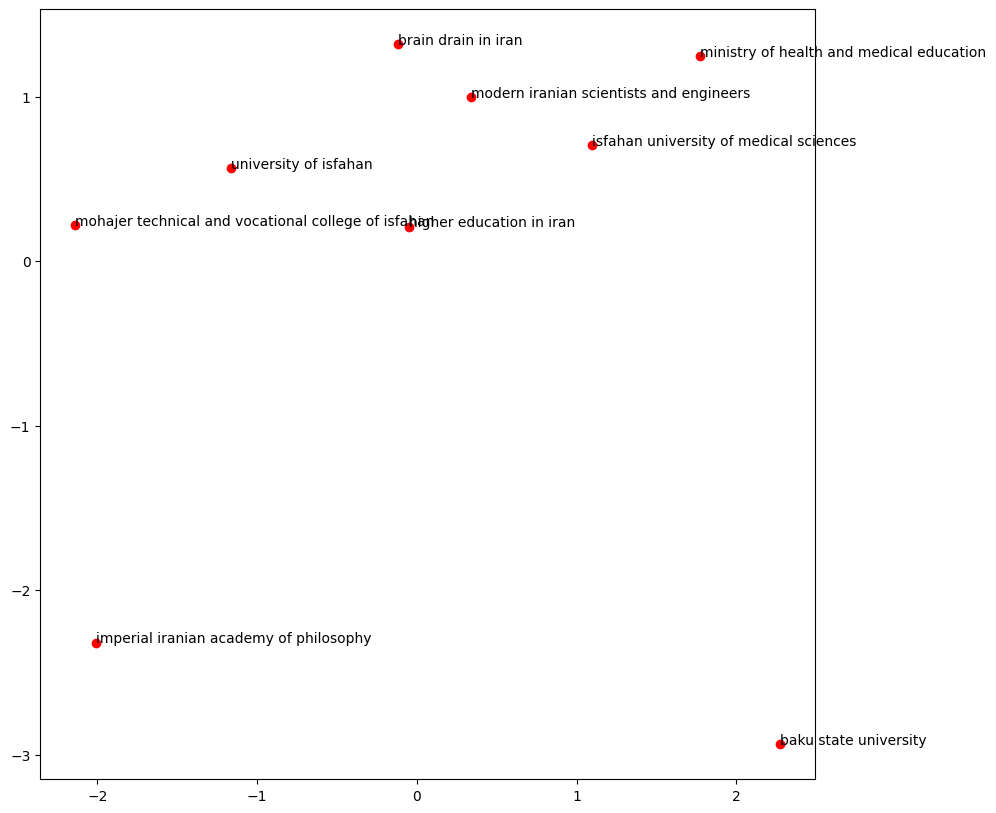

In [ ]:
temp = ['modern iranian scientists and engineers', 'brain drain in iran', 'baku state university',
        'isfahan university of medical sciences', 'ministry of health and medical education', 'university of isfahan',
        'imperial iranian academy of philosophy', 'higher education in iran', 'mohajer technical and vocational college of isfahan']


scatter_plot(temp)